# Customer Personality Analysis :

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
data = pd.read_csv("/data/notebook_files/marketing_campaign.csv",sep = "\t")

In [3]:
data.head()

ID 
 Year_Birth 
 Education 
 Marital_Status 
 Income 
 Kidhome 
 Teenhome 
 Dt_Customer 
 Recency 
 MntWines 
 ... 
 NumWebVisitsMonth 
 AcceptedCmp3 
 AcceptedCmp4 
 AcceptedCmp5 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Z_CostContact 
 Z_Revenue 
 Response 
 
 
 
 
 0 
 5524 
 1957 
 Graduation 
 Single 
 58138.0 
 0 
 0 
 04-09-2012 
 58 
 635 
 ... 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 1 
 
 
 1 
 2174 
 1954 
 Graduation 
 Single 
 46344.0 
 1 
 1 
 08-03-2014 
 38 
 11 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 2 
 4141 
 1965 
 Graduation 
 Together 
 71613.0 
 0 
 0 
 21-08-2013 
 26 
 426 
 ... 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 3 
 6182 
 1984 
 Graduation 
 Together 
 26646.0 
 1 
 0 
 10-02-2014 
 26 
 11 
 ... 
 6 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 4 
 5324 
 1981 
 PhD 
 Married 
 58293.0 
 1 
 0 
 19-01-2014 
 94 
 173 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 
 5 rows × 29 columns

In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.describe()

ID 
 Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 Recency 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 ... 
 NumWebVisitsMonth 
 AcceptedCmp3 
 AcceptedCmp4 
 AcceptedCmp5 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Z_CostContact 
 Z_Revenue 
 Response 
 
 
 
 
 count 
 2240.000000 
 2240.000000 
 2216.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 ... 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.0 
 2240.0 
 2240.000000 
 
 
 mean 
 5592.159821 
 1968.805804 
 52247.251354 
 0.444196 
 0.506250 
 49.109375 
 303.935714 
 26.302232 
 166.950000 
 37.525446 
 ... 
 5.316518 
 0.072768 
 0.074554 
 0.072768 
 0.064286 
 0.013393 
 0.009375 
 3.0 
 11.0 
 0.149107 
 
 
 std 
 3246.662198 
 11.984069 
 25173.076661 
 0.538398 
 0.544538 
 28.962453 
 336.597393 
 39.773434 
 225.715373 
 54.628979 
 ... 
 2.426645 
 0.259813 
 0.262728 
 0.259813 
 0.245316 
 0.114976 
 0.096391 
 0.0 
 0.0 
 0.356274 
 
 
 min 
 0.000000 
 1893.000000 
 1730.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 25% 
 2828.250000 
 1959.000000 
 35303.000000 
 0.000000 
 0.000000 
 24.000000 
 23.750000 
 1.000000 
 16.000000 
 3.000000 
 ... 
 3.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 50% 
 5458.500000 
 1970.000000 
 51381.500000 
 0.000000 
 0.000000 
 49.000000 
 173.500000 
 8.000000 
 67.000000 
 12.000000 
 ... 
 6.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 75% 
 8427.750000 
 1977.000000 
 68522.000000 
 1.000000 
 1.000000 
 74.000000 
 504.250000 
 33.000000 
 232.000000 
 50.000000 
 ... 
 7.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 max 
 11191.000000 
 1996.000000 
 666666.000000 
 2.000000 
 2.000000 
 99.000000 
 1493.000000 
 199.000000 
 1725.000000 
 259.000000 
 ... 
 20.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 3.0 
 11.0 
 1.000000 
 
 
 
 8 rows × 26 columns

In [6]:
data.dtypes

ID int64
Year_Birth int64
Education object
Marital_Status object
Income float64
Kidhome int64
Teenhome int64
Dt_Customer object
Recency int64
MntWines int64
MntFruits int64
MntMeatProducts int64
MntFishProducts int64
MntSweetProducts int64
MntGoldProds int64
NumDealsPurchases int64
NumWebPurchases int64
NumCatalogPurchases int64
NumStorePurchases int64
NumWebVisitsMonth int64
AcceptedCmp3 int64
AcceptedCmp4 int64
AcceptedCmp5 int64
AcceptedCmp1 int64
AcceptedCmp2 int64
Complain int64
Z_CostContact int64
Z_Revenue int64
Response int64
dtype: object

In [7]:
data.isna().sum()

ID 0
Year_Birth 0
Education 0
Marital_Status 0
Income 24
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Z_CostContact 0
Z_Revenue 0
Response 0
dtype: int64

In [8]:
data.shape

(2240, 29)

Numerical Columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical Columns: ['Education', 'Marital_Status', 'Dt_Customer']
Datetime Columns: []
Text Columns: []
Other Columns: []


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


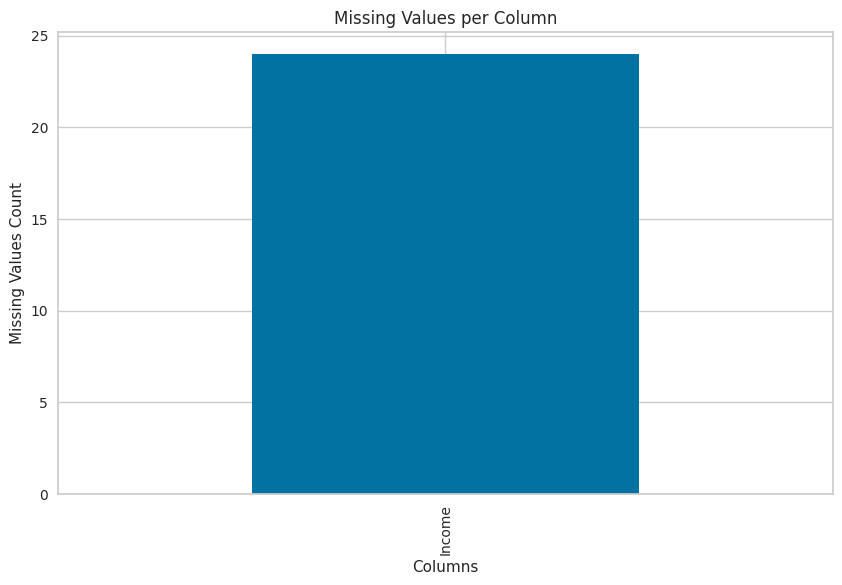

In [9]:
def separate_columns_by_type(df):
    numerical_cols = []
    categorical_cols = []
    datetime_cols = []
    text_cols = []
    other_cols = []

    for column in df.columns:
        if df[column].dtype in [int, float]:
            numerical_cols.append(column)
        elif df[column].dtype == 'object':
            categorical_cols.append(column)
        elif df[column].dtype == 'datetime64[ns]':
            datetime_cols.append(column)
        elif df[column].dtype == 'bool':
            categorical_cols.append(column)  # If boolean, treat as categorical
        else:
            other_cols.append(column)

    return numerical_cols, categorical_cols, datetime_cols, text_cols, other_cols

def plot_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Values per Column')
    plt.show()



df = data

numerical_cols, categorical_cols, datetime_cols, text_cols, other_cols = separate_columns_by_type(df)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Datetime Columns:", datetime_cols)
print("Text Columns:", text_cols)
print("Other Columns:", other_cols)

plot_missing_values(df)

In [10]:
data.head()

ID 
 Year_Birth 
 Education 
 Marital_Status 
 Income 
 Kidhome 
 Teenhome 
 Dt_Customer 
 Recency 
 MntWines 
 ... 
 NumWebVisitsMonth 
 AcceptedCmp3 
 AcceptedCmp4 
 AcceptedCmp5 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Z_CostContact 
 Z_Revenue 
 Response 
 
 
 
 
 0 
 5524 
 1957 
 Graduation 
 Single 
 58138.0 
 0 
 0 
 04-09-2012 
 58 
 635 
 ... 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 1 
 
 
 1 
 2174 
 1954 
 Graduation 
 Single 
 46344.0 
 1 
 1 
 08-03-2014 
 38 
 11 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 2 
 4141 
 1965 
 Graduation 
 Together 
 71613.0 
 0 
 0 
 21-08-2013 
 26 
 426 
 ... 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 3 
 6182 
 1984 
 Graduation 
 Together 
 26646.0 
 1 
 0 
 10-02-2014 
 26 
 11 
 ... 
 6 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 4 
 5324 
 1981 
 PhD 
 Married 
 58293.0 
 1 
 0 
 19-01-2014 
 94 
 173 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 
 5 rows × 29 columns

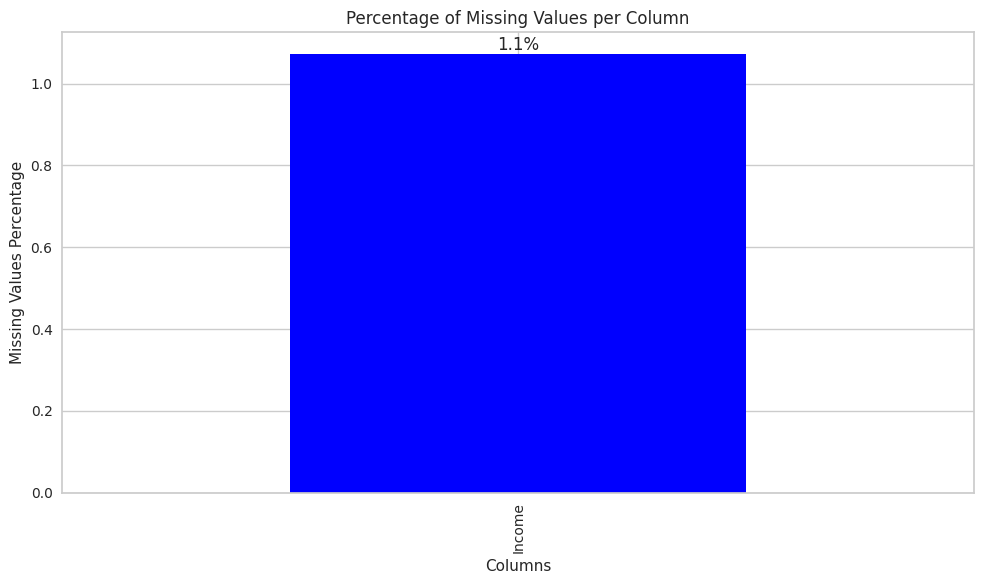

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values_percentage = (missing_values / len(df)) * 100
    missing_values_percentage.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    ax = missing_values_percentage.plot(kind='bar', color='blue')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Missing Values Percentage')
    ax.set_title('Percentage of Missing Values per Column')

    ax.set_xticklabels(missing_values_percentage.index, rotation=90)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


df = data

plot_missing_values(df)

## DATA CLEANING 

In this step : 

- Data Cleaning
- Feature Engineering
  
In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### From the above output, we can conclude and note that:

- There are missing values in income
- Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
- There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

First of all, for the missing values, I am simply going to drop the rows that have missing income values.

In [13]:
#Remove the NA Values
data = data.dropna()
print("The total number of data-points after removing the with missing values are :",len(data))

The total number of data-points after removing the with missing values are : 2216


In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [14]:
data['Dt_Customer'][:5]

0 04-09-2012
1 08-03-2014
2 21-08-2013
3 10-02-2014
4 19-01-2014
Name: Dt_Customer, dtype: object

In [15]:
data['Dt_Customer'].isnull().sum()

0

In [16]:
import pandas as pd

# Créez votre DataFrame (exemple ici)
data1 = {
    'Name': ['John', 'Jane', None],
    'Age': [25, None, 35],
    'City': ['New York', None, 'London'],
    'Salary': [50000, 60000, 70000],
    'DateOfBirth': ['1995-01-01', '1990-02-02', None],
    'Active': [True, True, False]
}

df = pd.DataFrame(data1)

# Affiche les valeurs manquantes par colonne
missing_values = df.isnull().sum()
print(missing_values)

# Affiche les lignes avec au moins une valeur manquante
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

Name           1
Age            1
City           1
Salary         0
DateOfBirth    1
Active         0
dtype: int64
   Name   Age    City  Salary DateOfBirth  Active
1  Jane   NaN    None   60000  1990-02-02    True
2  None  35.0  London   70000        None   False


In [17]:
import pandas as pd

# Créez votre DataFrame (exemple ici)
data2 = {
    'Name': ['John', 'Jane', None],
    'Age': [25, None, 35],
    'City': ['New York', None, 'London'],
    'Salary': [50000, 60000, 70000],
    'DateOfBirth': ['1995-01-01', '1990-02-02', None],
    'Active': [True, True, False]
}

df = pd.DataFrame(data2)

# Sélectionne la colonne spécifique (par exemple 'Age')
column_name = 'Age'
column_values = df[column_name]

# Affiche les lignes avec des valeurs manquantes dans la colonne spécifique
rows_with_missing_values = df[column_values.isnull()]
print(rows_with_missing_values)

   Name  Age  City  Salary DateOfBirth  Active
1  Jane  NaN  None   60000  1990-02-02    True


In [18]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
Dt_cust = data['Dt_Customer']
rows_with_missing_values = data[Dt_cust.isnull()]
print(rows_with_missing_values)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [20]:
data.isnull().sum()

ID 0
Year_Birth 0
Education 0
Marital_Status 0
Income 0
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Z_CostContact 0
Z_Revenue 0
Response 0
dtype: int64

In [21]:
# Supprime les lignes avec des valeurs manquantes
#df = data[data['Dt_Customer']].dropna()
#df.isnull().sum()

# Remplace les valeurs manquantes par une valeur spécifique
#df_filled = df.fillna({'Age': 0, 'City': 'Unknown'})
#print(df_filled)

In [22]:
import warnings
warnings.filterwarnings('ignore')

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates = []

for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the reocrds:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the reocrds: 2012-01-08


Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded dat

In [23]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates :
    delta = d1 - i
    days.append(delta)
data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data['Customer_For'],errors="coerce")

In [24]:
data['Customer_For'][:5]

0 83894400000000000
1 10800000000000000
2 40780800000000000
3 5616000000000000
4 27734400000000000
Name: Customer_For, dtype: int64

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [25]:
print("Total categories in the feature Marital_Satus:\n",data["Marital_Status"].value_counts(),"\n")
print("-"*100)
print('Total categories in the feature Education:\n',data['Education'].value_counts())

Total categories in the feature Marital_Satus:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

----------------------------------------------------------------------------------------------------
Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### In the next bit, I will be performing the following steps to engineer some new features:

- Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
- Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
- Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
- Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
- To get further clarity of household, Creating feature indicating "Family_Size"
- Create a feature "Is_Parent" to indicate parenthood status
- Lastly, I will create three categories in the "Education" by simplifying its value counts.
- Dropping some of the redundant features

### Feature engineering :

In [26]:
data['Year_Birth'][:3]

0 1957
1 1954
2 1965
Name: Year_Birth, dtype: int64

In [27]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner",
                                                    "Absurd":"Alone",
                                                    "Widow":"Alone",
                                                    "YOLO":"Alone",
                                                    "Divorced":"Alone",
                                                    "Single":"Alone"})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate",
                                             "Master":"Postgraduate",
                                             "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits",
                          "MntMeatProducts":"Meat","MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Now that we have some new features let's have a look at the data's stats.

In [28]:
data.describe()

Income 
 Kidhome 
 Teenhome 
 Recency 
 Wines 
 Fruits 
 Meat 
 Fish 
 Sweets 
 Gold 
 ... 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Response 
 Customer_For 
 Age 
 Spent 
 Children 
 Family_Size 
 Is_Parent 
 
 
 
 
 count 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 ... 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2.216000e+03 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 2216.000000 
 
 
 mean 
 52247.251354 
 0.441787 
 0.505415 
 49.012635 
 305.091606 
 26.356047 
 166.995939 
 37.637635 
 27.028881 
 43.965253 
 ... 
 0.064079 
 0.013538 
 0.009477 
 0.150271 
 4.423735e+16 
 52.179603 
 607.075361 
 0.947202 
 2.592509 
 0.714350 
 
 
 std 
 25173.076661 
 0.536896 
 0.544181 
 28.948352 
 337.327920 
 39.793917 
 224.283273 
 54.752082 
 41.072046 
 51.815414 
 ... 
 0.244950 
 0.115588 
 0.096907 
 0.357417 
 2.008532e+16 
 11.985554 
 602.900476 
 0.749062 
 0.905722 
 0.451825 
 
 
 min 
 1730.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000e+00 
 25.000000 
 5.000000 
 0.000000 
 1.000000 
 0.000000 
 
 
 25% 
 35303.000000 
 0.000000 
 0.000000 
 24.000000 
 24.000000 
 2.000000 
 16.000000 
 3.000000 
 1.000000 
 9.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2.937600e+16 
 44.000000 
 69.000000 
 0.000000 
 2.000000 
 0.000000 
 
 
 50% 
 51381.500000 
 0.000000 
 0.000000 
 49.000000 
 174.500000 
 8.000000 
 68.000000 
 12.000000 
 8.000000 
 24.500000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 4.432320e+16 
 51.000000 
 396.500000 
 1.000000 
 3.000000 
 1.000000 
 
 
 75% 
 68522.000000 
 1.000000 
 1.000000 
 74.000000 
 505.000000 
 33.000000 
 232.250000 
 50.000000 
 33.000000 
 56.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 5.927040e+16 
 62.000000 
 1048.000000 
 1.000000 
 3.000000 
 1.000000 
 
 
 max 
 666666.000000 
 2.000000 
 2.000000 
 99.000000 
 1493.000000 
 199.000000 
 1725.000000 
 259.000000 
 262.000000 
 321.000000 
 ... 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 9.184320e+16 
 128.000000 
 2525.000000 
 3.000000 
 5.000000 
 1.000000 
 
 
 
 8 rows × 28 columns

The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that max-age is 128 years, As I calculated the age that would be today and the data is old.

I must take a look at the broader view of the data. I will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

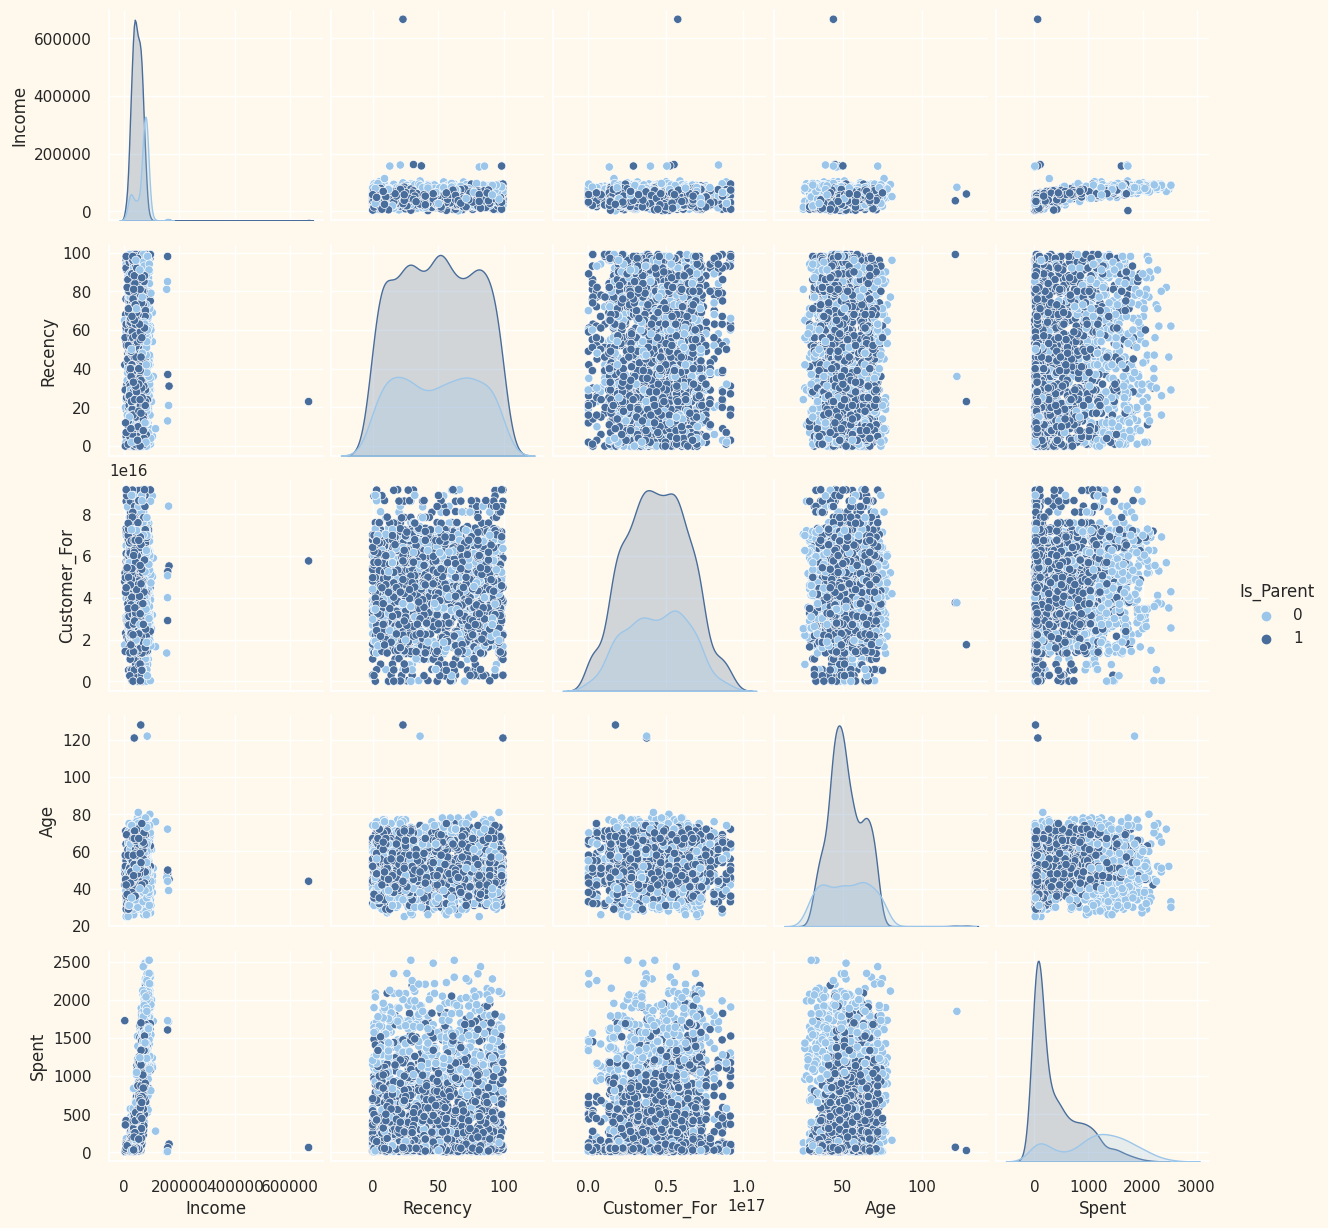

In [29]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.colors as colors

sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
# Liste de couleurs bleues variantes
pallet = ["#283B63", "#496D9B", "#73A1D2", "#9CC6E9", "#C5ECFF", "#F2FAFF"]
# Création de la colormap avec les couleurs bleues
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#9CC6E9", "#C5ECFF", "#F2FAFF"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#9CC6E9","#496D9B"]))
#Taking hue 
plt.show()


Note: 

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [30]:
#Dropping the outliers by setting a cap on Age and income : 
data = data[(data['Age']<90)]
data = data[(data['Income']<600000)]
print("The total number of data-points after removing the outliers are:",len(data))

The total number of data-points after removing the outliers are: 2212


<AxesSubplot:>

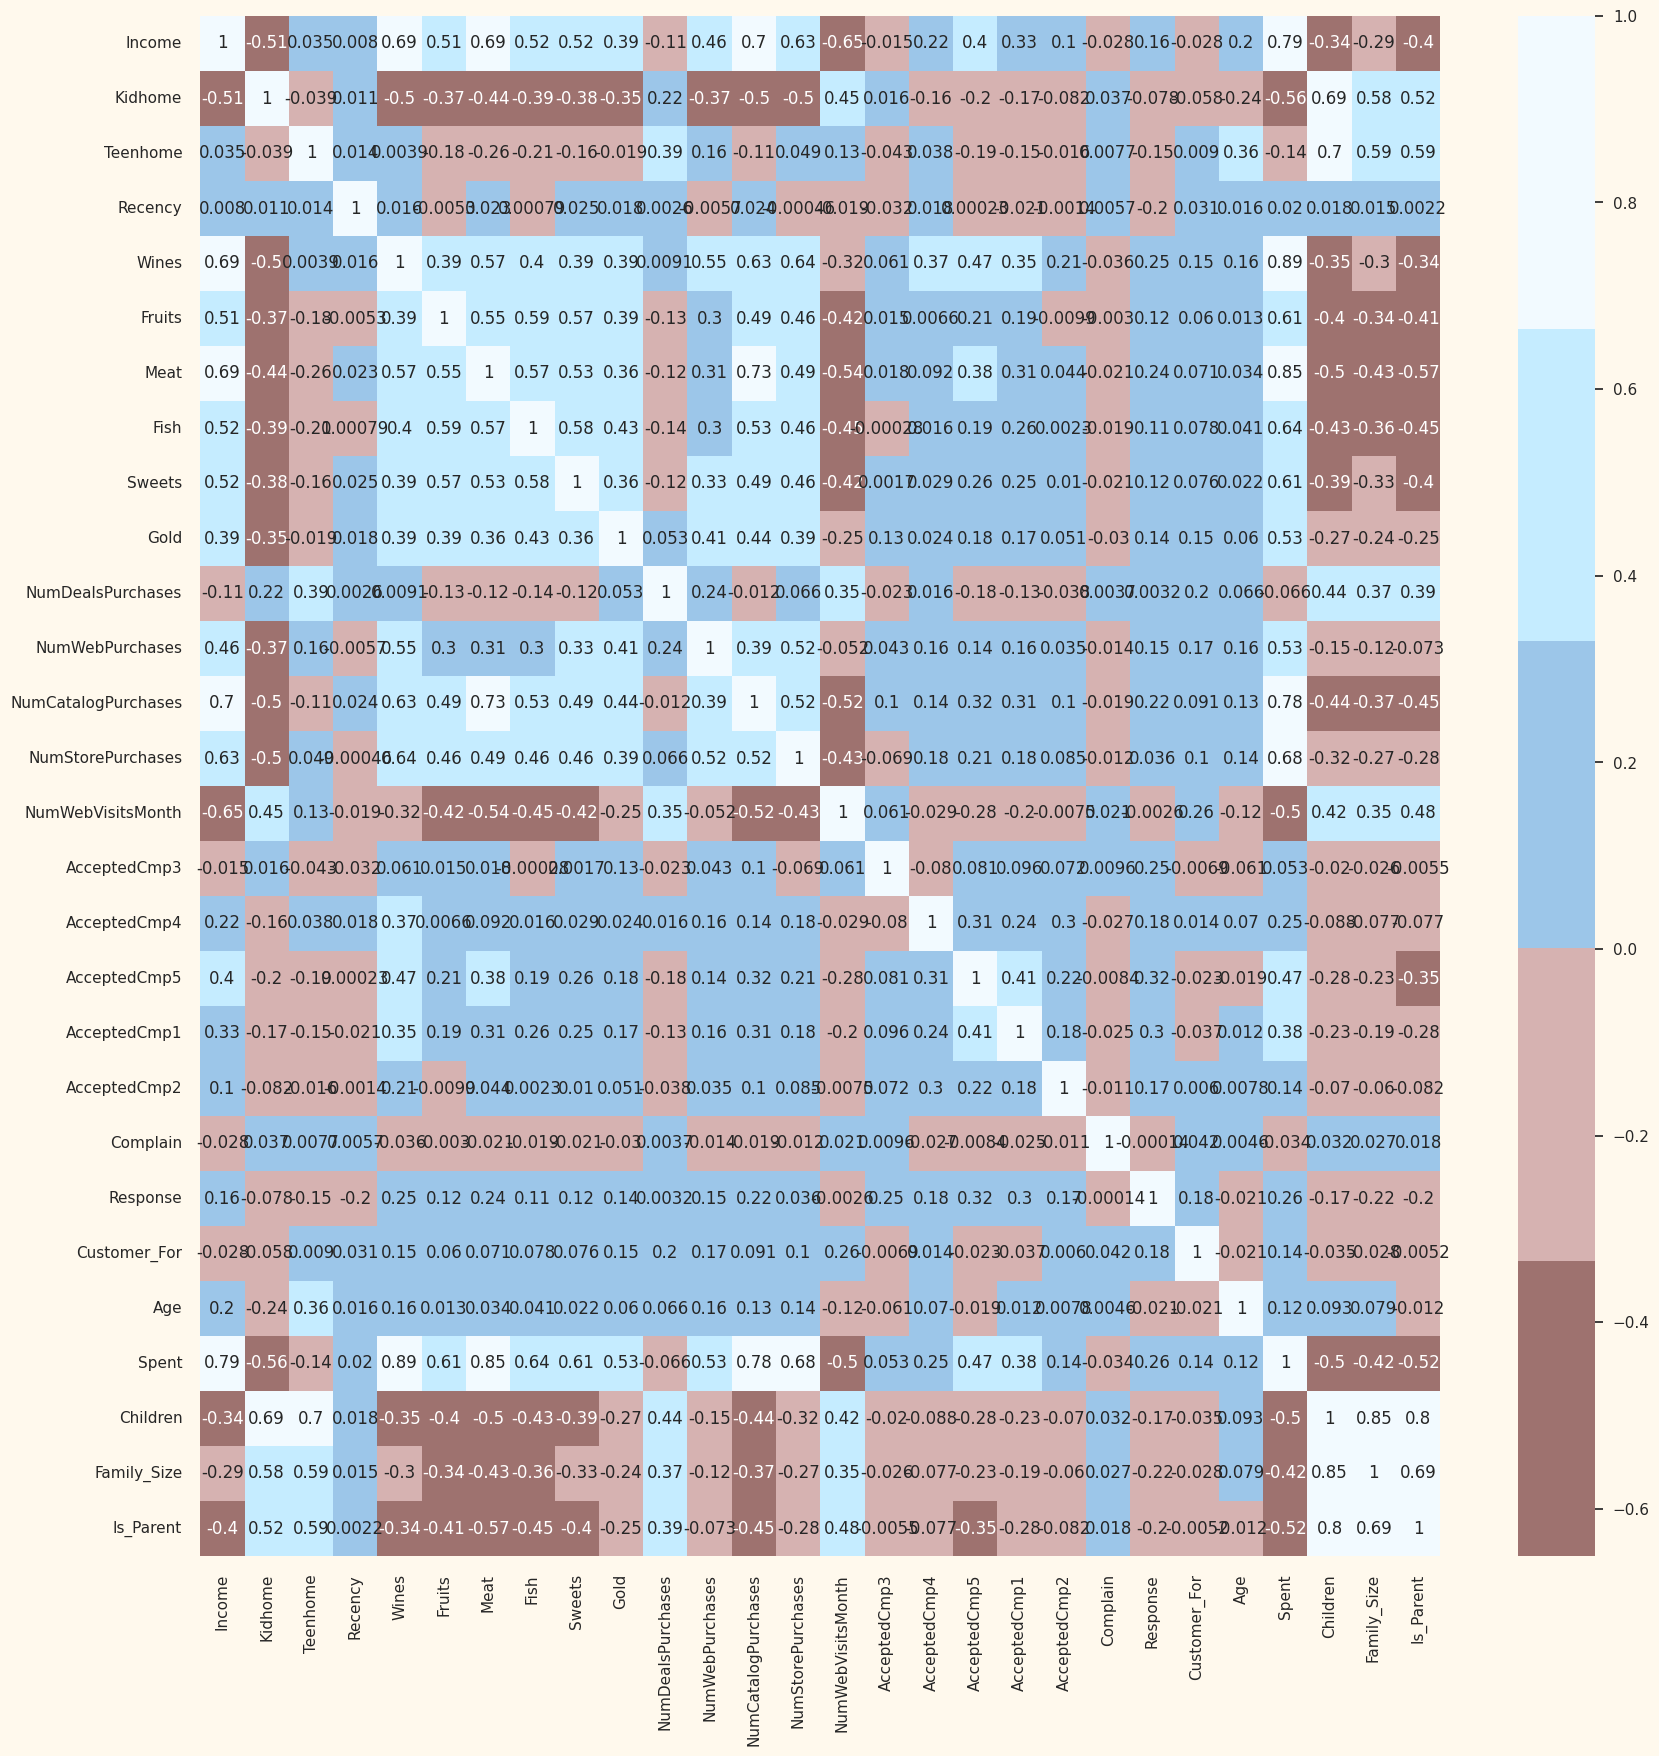

In [31]:
#Correlation matrix
cormat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormat,annot=True,cmap=cmap,center=0)

Note : 

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

## DATA PREPROCESSING :

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction


In [32]:
#Get list of catégorical variables:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables in the dataset:",object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [33]:
#Label encoding the object dtypes:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("Finish : all features are now numerical !")

Finish : all features are now numerical !


In [34]:
#Creating a copy of data:
df = data.copy()
#Creating a subset of df by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del,axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns =df.columns)
print("Finish :all features are now scaled ! ")

Finish :all features are now scaled ! 


In [35]:
#Scaled data to be used for reducing the dimensionality 
print("Dataframe to be used for further modelling :")
scaled_df.head()

Dataframe to be used for further modelling :


Education 
 Income 
 Kidhome 
 Teenhome 
 Recency 
 Wines 
 Fruits 
 Meat 
 Fish 
 Sweets 
 ... 
 NumCatalogPurchases 
 NumStorePurchases 
 NumWebVisitsMonth 
 Customer_For 
 Age 
 Spent 
 Living_With 
 Children 
 Family_Size 
 Is_Parent 
 
 
 
 
 0 
 -0.893586 
 0.287105 
 -0.822754 
 -0.929699 
 0.310353 
 0.977660 
 1.552041 
 1.690293 
 2.453472 
 1.483713 
 ... 
 2.503607 
 -0.555814 
 0.692181 
 1.973583 
 1.018352 
 1.676245 
 -1.349603 
 -1.264598 
 -1.758359 
 -1.581139 
 
 
 1 
 -0.893586 
 -0.260882 
 1.040021 
 0.908097 
 -0.380813 
 -0.872618 
 -0.637461 
 -0.718230 
 -0.651004 
 -0.634019 
 ... 
 -0.571340 
 -1.171160 
 -0.132545 
 -1.665144 
 1.274785 
 -0.963297 
 -1.349603 
 1.404572 
 0.449070 
 0.632456 
 
 
 2 
 -0.893586 
 0.913196 
 -0.822754 
 -0.929699 
 -0.795514 
 0.357935 
 0.570540 
 -0.178542 
 1.339513 
 -0.147184 
 ... 
 -0.229679 
 1.290224 
 -0.544908 
 -0.172664 
 0.334530 
 0.280110 
 0.740959 
 -1.264598 
 -0.654644 
 -1.581139 
 
 
 3 
 -0.893586 
 -1.176114 
 1.040021 
 -0.929699 
 -0.795514 
 -0.872618 
 -0.561961 
 -0.655787 
 -0.504911 
 -0.585335 
 ... 
 -0.913000 
 -0.555814 
 0.279818 
 -1.923210 
 -1.289547 
 -0.920135 
 0.740959 
 0.069987 
 0.449070 
 0.632456 
 
 
 4 
 0.571657 
 0.294307 
 1.040021 
 -0.929699 
 1.554453 
 -0.392257 
 0.419540 
 -0.218684 
 0.152508 
 -0.001133 
 ... 
 0.111982 
 0.059532 
 -0.132545 
 -0.822130 
 -1.033114 
 -0.307562 
 0.740959 
 0.069987 
 0.449070 
 0.632456 
 
 
 
 5 rows × 23 columns

## DIMENSIONALITY REDUCTION :

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

- Dimensionality reduction with PCA
- Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [36]:
#Initating PCA to reduce dimention aka features to 3 :
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df),columns=(['col1',"col2","col3"]))
PCA_df.describe().T

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 col1 
 2212.0 
 -1.284887e-16 
 2.878377 
 -5.969392 
 -2.538494 
 -0.780421 
 2.383290 
 7.444305 
 
 
 col2 
 2212.0 
 -2.569775e-17 
 1.706839 
 -4.312209 
 -1.328327 
 -0.158189 
 1.242295 
 6.142693 
 
 
 col3 
 2212.0 
 3.774357e-17 
 1.221957 
 -3.530781 
 -0.828779 
 -0.021953 
 0.799042 
 6.616011

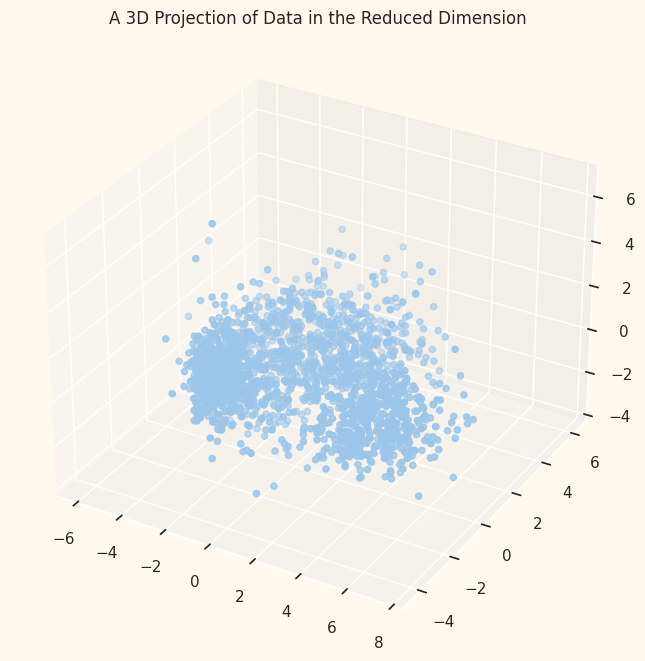

In [37]:
# A 3D Projection of Data ine the Reduced Dimension

x = PCA_df['col1']
y = PCA_df['col2']
z = PCA_df['col3']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c="#9CC6E9",marker="o")
ax.set_title("A 3D Projection of Data in the Reduced Dimension")
plt.show()

## CLUSTERING 

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed :


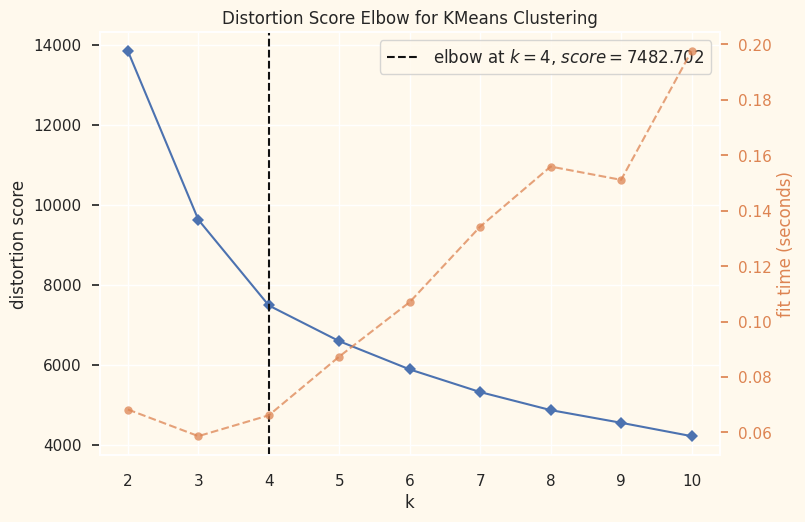

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
#Quick test of elbow method to find number of cluster to make: 
print("Elbow Method to determine the number of clusters to be formed :")
Elbow_M = KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

Note : 

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [39]:
#Initiating the agglomerative Clustering model :
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict Clusters:
Cul_AC = AC.fit_predict(PCA_df)
PCA_df['Clusters'] = Cul_AC
#Adding the clusters feature to the original DF :
data["Clusters"] = Cul_AC

In [40]:
data['Clusters'][:5]

0 3
1 2
2 3
3 1
4 2
Name: Clusters, dtype: int64

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

In [41]:
cmap = colors.ListedColormap(["maroon", "orange","#9CC6E9", "#DFFF00"])

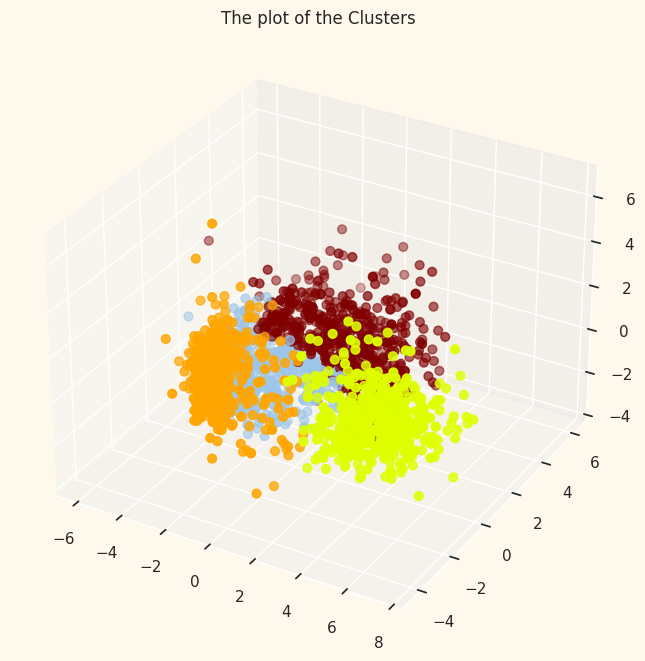

In [42]:
#Ploting the clusters:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111,projection="3d",label='bla')
ax.scatter(x,y,z,s=40,c=PCA_df['Clusters'],marker='o',cmap=cmap)
ax.set_title("The plot of the Clusters")
plt.show()

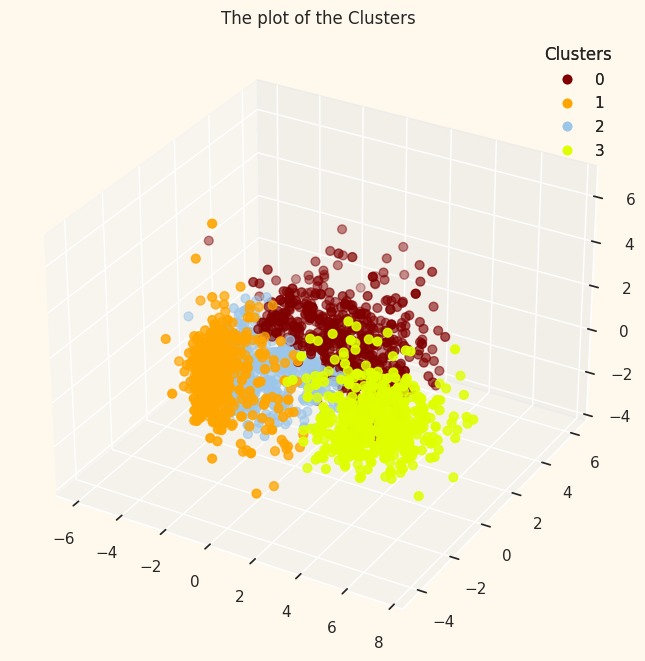

In [43]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ploting des clusters
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection="3d", label='bla')
scatter = ax.scatter(x, y, z, s=40, c=PCA_df['Clusters'], marker='o', cmap=cmap)
ax.set_title("The plot of the Clusters")

# Ajouter la légende
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
ax.add_artist(legend)

plt.show()

## EVALUATING MODELS : 

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustering**

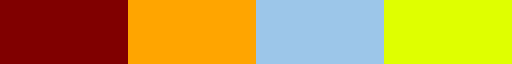

In [44]:
cmap

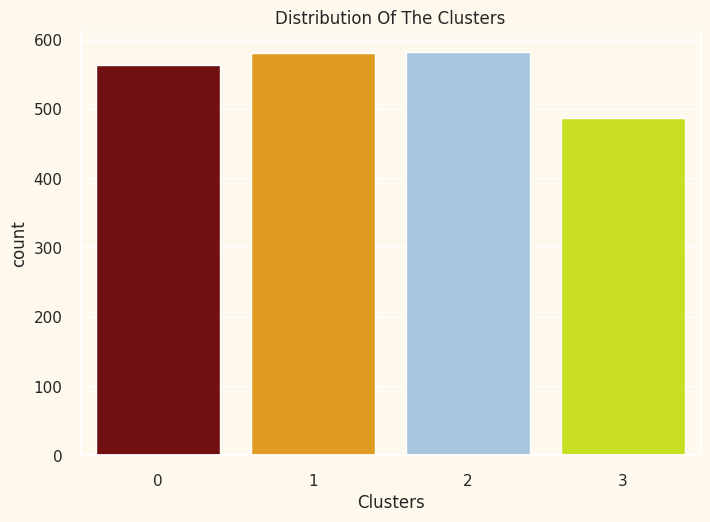

In [45]:
#Plotting countplot of clusters
pal = ["maroon", "orange","#9CC6E9", "#DFFF00"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Note:

The clusters seem to be fairly distributed.

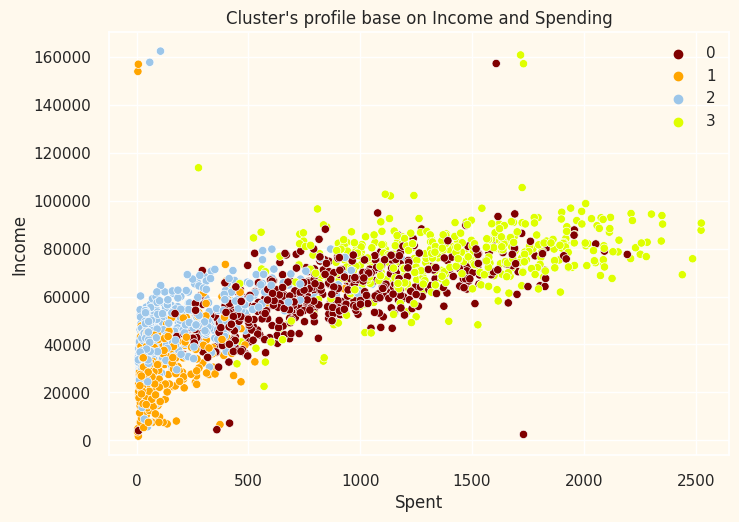

In [46]:
pl = sns.scatterplot(data=data,x=data['Spent'],y=data['Income'],hue=data['Clusters'],palette=pal)
pl.set_title("Cluster's profile base on Income and Spending")
plt.legend()
plt.show()

Note :

**Income vs spending plot shows the clusters pattern**

- group 0: high spending & average income
- group 1: high spending & high income
- group 2: low spending & low income
- group 3: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

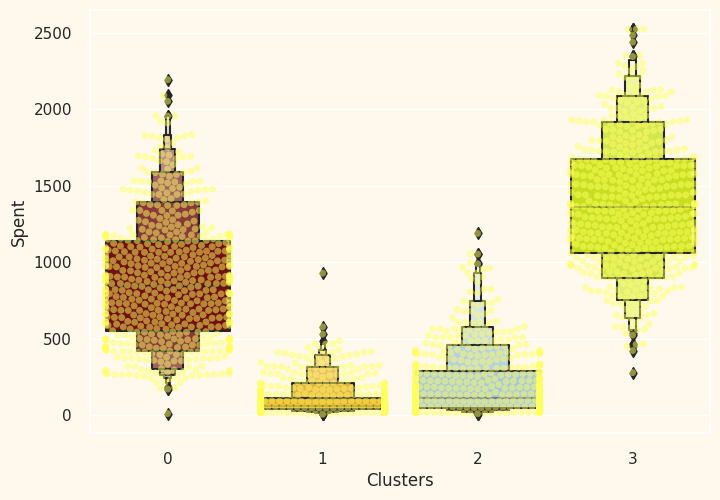

In [47]:
plt.figure()
pl = sns.swarmplot(x=data['Clusters'],y=data['Spent'],color = "#ffff61",alpha=0.5)
pl = sns.boxenplot(x=data['Clusters'],y=data['Spent'],palette = pal)
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

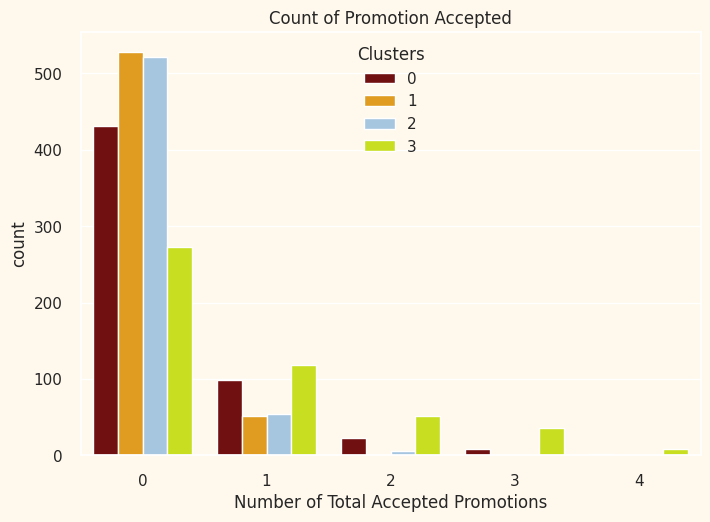

In [48]:
#Creating a features to get a sum of accepted promotions
data['Total_Promos'] = data['AcceptedCmp1'] + data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']
#Plotting count of total campaign accepted
plt.figure()
pl = sns.countplot(x=data['Total_Promos'],hue=data['Clusters'],palette =pal)
pl.set_title('Count of Promotion Accepted')
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

Note : 

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

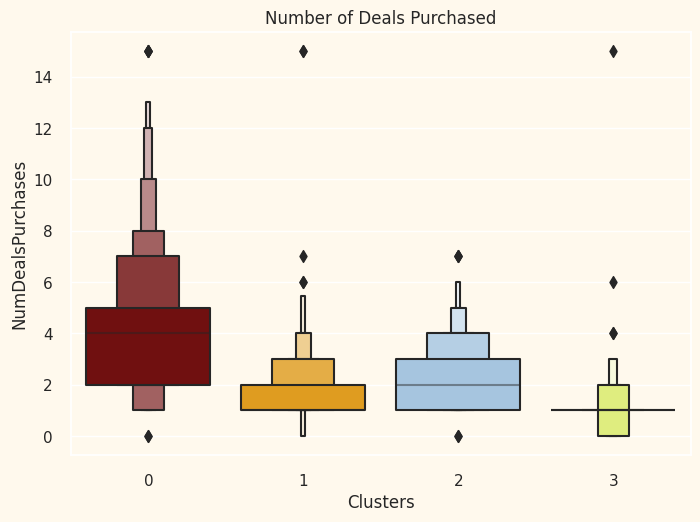

In [49]:
#Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"],palette=pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Note :

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 2. However, our star customers cluster 3 are not much into the deals. Nothing seems to attract cluster 1 overwhelmingly
        

## PROFILING 

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

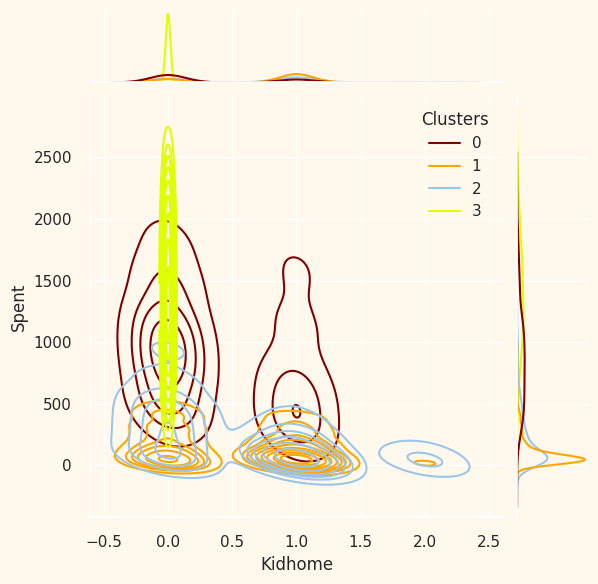

<Figure size 800x550 with 0 Axes>

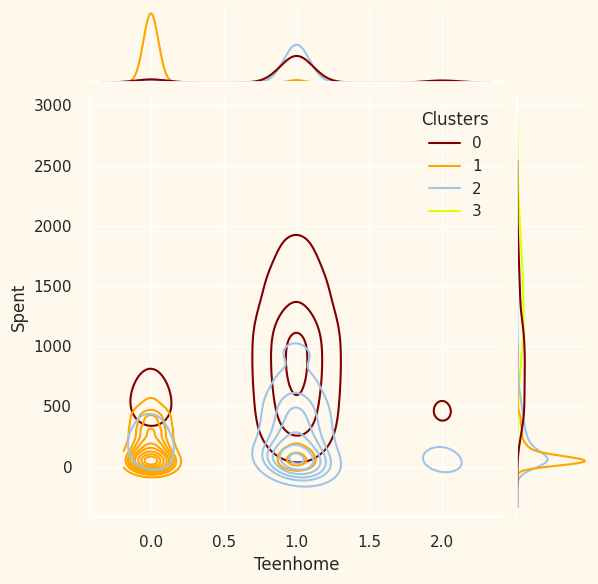

<Figure size 800x550 with 0 Axes>

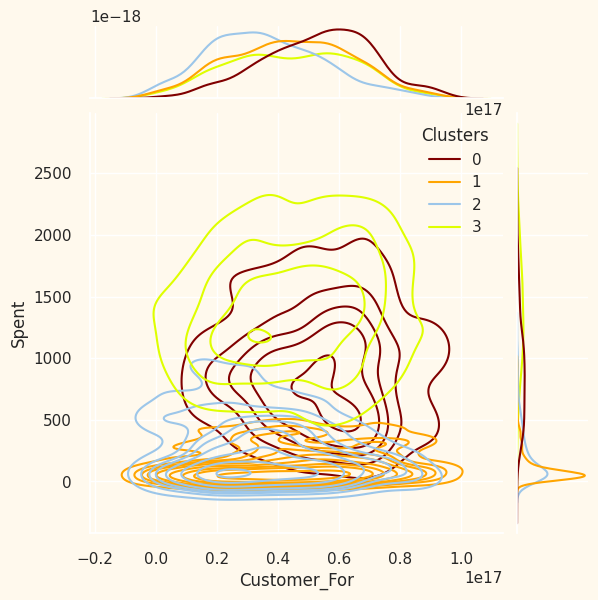

<Figure size 800x550 with 0 Axes>

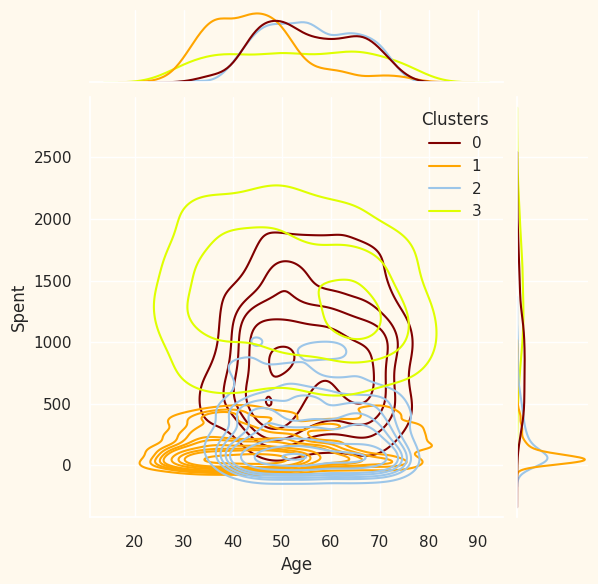

<Figure size 800x550 with 0 Axes>

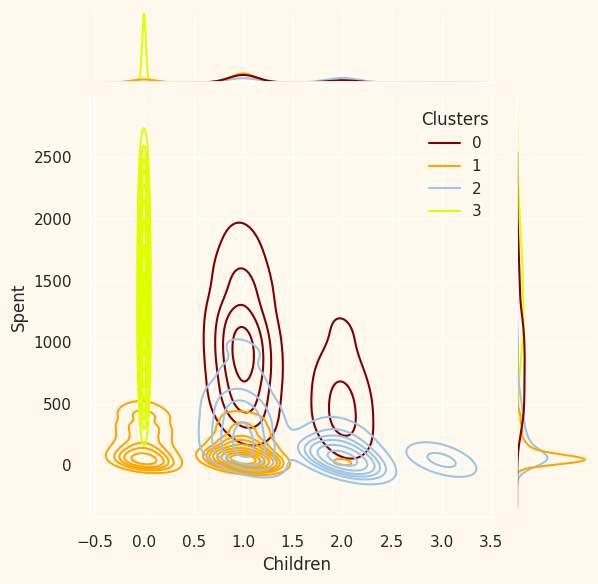

<Figure size 800x550 with 0 Axes>

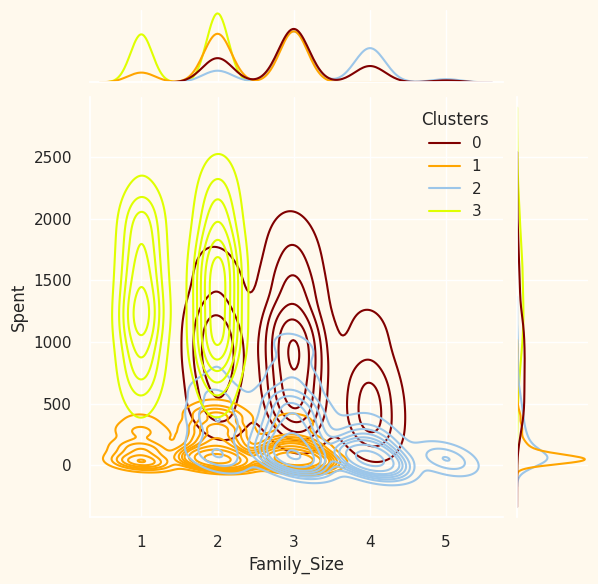

<Figure size 800x550 with 0 Axes>

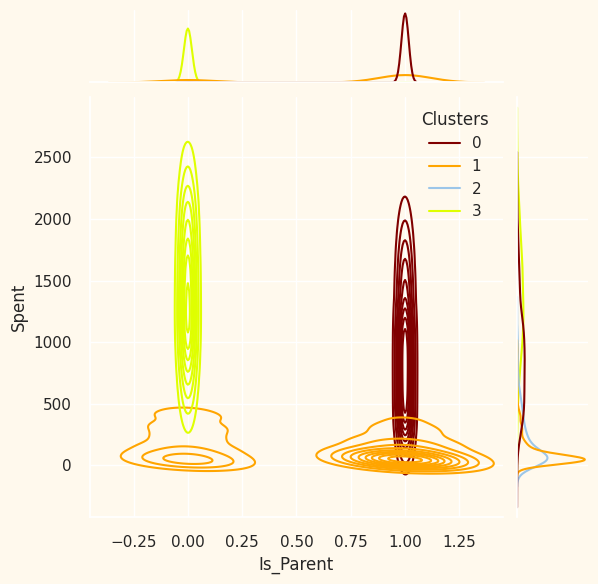

<Figure size 800x550 with 0 Axes>

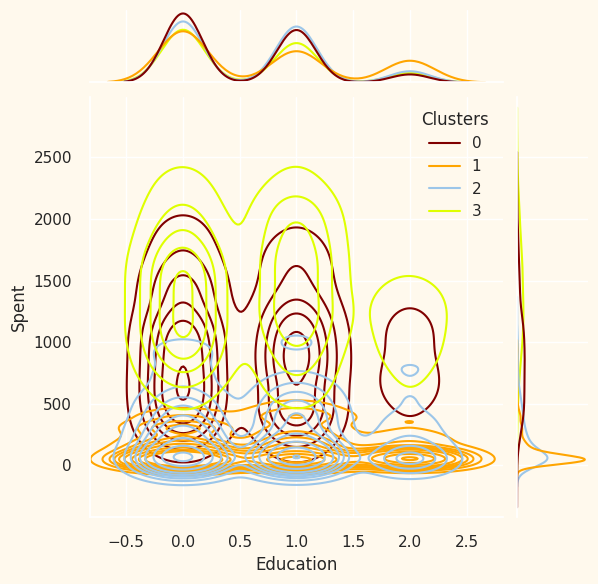

<Figure size 800x550 with 0 Axes>

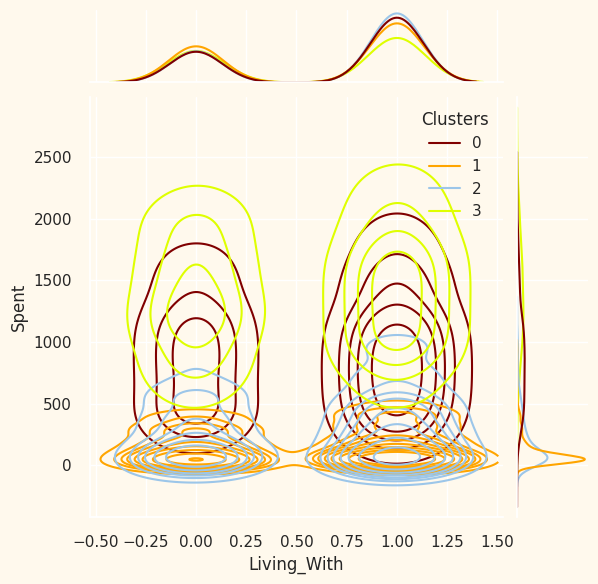

In [50]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Spent'],hue=data['Clusters'],kind="kde",palette = pal)
    plt.show()

## LAST POINTS:

The following information can be deduced about the customers in different clusters.

- <span style="color:maroon">**About Cluster 0 :**</span>
    
    * Are a definitely a parent
    * At the max have 4 members in the family and at least 2
    * Single parents are a subset of this group
    * Most have a teenagers at home
    * Relatively older 


- <span style="color:orange">**About Cluster 1 :**</span>
    * The majority of theses people are parents
    * At the max are 3 members in the family 
    * They majorly have one kid(and not teenagers,typically)
    * Relatively younger
  
- <span style="color:#9CC6E9">**About Cluster 2 :**</span>
    * They are definitely a parent
    * At the max are 5 members in the family and at least 2
    * Majority of them have a teenager at home
    * Relatively older
    * A lower income group 

- <span style="color:#DFFF00">**About Cluster 3 :**</span>
    
    * Are a definitely not a parent
    * at the max are only 2 members in the family 
    * A slight majority of couples over single people 
    * Span all ages
    * A high Income group
  

# In Brief : 

In this project, I performed unsupervised clustering.

I did use dimensionality reduction followed by agglomerative clustering. 

I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending.

This can be used in planning better marketing strategies.